<a href="https://colab.research.google.com/github/Joshua1030/APS360_Team17/blob/main/Primary_model_ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Data Loading and Splitting
Download data from kaggle and split them into train, validation, and test sets. Data are downloded from https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification

Since the dataset contains about 10,000 images over 6 categories, it will take very long to train our model. Our team decide to randomly choose 500 images for training, 100 images for validation, and 100 images for testing, from each category. 
Datasets can be downloaded by link: https://drive.google.com/drive/folders/1vMEit7Gcn2ZQd1DnRtb2J6Gn7FbUQP4T?usp=share_link

In [ ]:
#import libraries
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#make sure to use the correct address
#small dataset for tune hyperparameters
#Weiman Sun_data_path
train_dir = "/content/gdrive/MyDrive/APS360/Project_data_set/APS360_Data_Small_Train"
val_dir = "/content/gdrive/MyDrive/APS360/Project_data_set/APS360_Data_Small_Val"
test_dir = "/content/gdrive/MyDrive/APS360/Project_data_set/APS360_Data_Small_Test"

In [ ]:
#data are downloded from https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
classes = ('freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges')

#resize all images to 224x224
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

trainset = torchvision.datasets.ImageFolder(train_dir, transform=transform)
valset = torchvision.datasets.ImageFolder(val_dir, transform=transform)
testset = torchvision.datasets.ImageFolder(test_dir, transform=transform)


#data loader
batch_size = 16

train_loader = torch.utils.data.DataLoader(trainset, batch_size=16, num_workers=1, shuffle=True)
val_loader = torch.utils.data.DataLoader(valset, batch_size=16, num_workers=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=16, num_workers=1, shuffle=True)

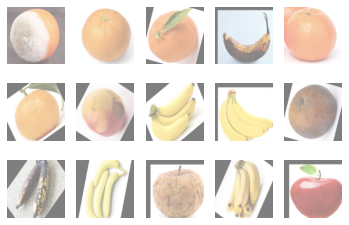

In [ ]:
#Visualize data
k = 0
for images, labels in val_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    #print(labels)
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

Primary Model

In [ ]:
#Convolutional Neural Network Architecture
class CNN(nn.Module):
    def __init__(self):
        self.name = "CNN"
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
        self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(10*53*53, 32)
        self.fc2 = nn.Linear(32, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10*53*53)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    print('Convolutional Neural Network Architecture Done')

Convolutional Neural Network Architecture Done


In [ ]:
#overcome overfitting
class CNN_dropout(nn.Module):
    def __init__(self):
        self.name = "CNN_dropout"
        super(CNN_dropout, self).__init__()
        self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
        self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
        self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(10*53*53, 32)
        self.fc2 = nn.Linear(32, 6)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10*53*53)
        x = F.relu(self.fc1(x))
        # Apply dropout
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
    print('Convolutional Neural Network Architecture Done')

Convolutional Neural Network Architecture Done


In [ ]:
#Convolutional Neural Network Architecture
class CNN_new(nn.Module):
    def __init__(self):
        self.name = "CNN_new"
        super(CNN_new, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) #in_channels, out_chanels, kernel_size
        #self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
        self.conv2 = nn.Conv2d(16, 8, 3, padding=1) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(8*56*56, 56)
        self.fc2 = nn.Linear(56, 6)
        self.relu = nn.ReLU()
        #self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = F.max_pool2d(self.relu(self.conv1(x)), 2)
        x = F.max_pool2d(self.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        # Apply dropout
        # x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
#add dropout on new CNN
class CNN_new_drop(nn.Module):
    def __init__(self):
        self.name = "CNN_new_drop"
        super(CNN_new_drop, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) #in_channels, out_chanels, kernel_size
        #self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
        self.conv2 = nn.Conv2d(16, 8, 3, padding=1) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(8*56*56, 56)
        self.fc2 = nn.Linear(56, 6)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = F.max_pool2d(self.relu(self.conv1(x)), 2)
        x = F.max_pool2d(self.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        # Apply dropout
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
import matplotlib.pyplot as plt
def train(model, train, valid, batch_size=64, num_epochs=5, learning_rate=1e-5):
    torch.manual_seed(1000)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    train_losses, valid_losses, train_acc, valid_acc = [], [], [], []
    epochs = []
    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, num_workers=1, shuffle=True)  
    valid_loader = torch.utils.data.DataLoader(valid, batch_size=batch_size, num_workers=1, shuffle=True)  

  # training
    for epoch in range(num_epochs):
        for imgs, labels in train_loader:
        
        
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
        train_losses.append(float(loss))

        for imgs, labels in valid_loader:
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################

            out = model(imgs)
            loss = criterion(out, labels)
        valid_losses.append(float(loss))

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, train, batch_size))
        valid_acc.append(get_accuracy(model, valid, batch_size))
        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
              epoch+1, loss, train_acc[-1], valid_acc[-1]))
        
        # Save the current model (checkpoint) to a file
        model_path = "model_{0}_bs{1}_lr{2}_epoch{3}_valacc{4}".format(model.name, batch_size, learning_rate, epoch, round(valid_acc[-1],4))
        torch.save(model.state_dict(), model_path)

    # plotting
    plt.title("Training Curve")
    plt.plot(train_losses, label="Train")
    plt.plot(valid_losses, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

In [ ]:
def get_accuracy(model, data, batch_size):
    data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, num_workers=1, shuffle=True)  

    correct = 0
    total = 0
    for imgs, labels in data_loader:

        # to enable GPU Usage
        # begin
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        # end

        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

CUDA is available!  Training on GPU ...
Epoch 1; Loss 1.001838; Train Acc 0.511667; Val Acc 0.511667
Epoch 2; Loss 0.844058; Train Acc 0.694667; Val Acc 0.706667
Epoch 3; Loss 0.511157; Train Acc 0.768667; Val Acc 0.756667
Epoch 4; Loss 0.665793; Train Acc 0.777000; Val Acc 0.770000
Epoch 5; Loss 0.691908; Train Acc 0.816667; Val Acc 0.788333
Epoch 6; Loss 0.641479; Train Acc 0.846333; Val Acc 0.795000
Epoch 7; Loss 0.468301; Train Acc 0.881000; Val Acc 0.821667
Epoch 8; Loss 0.365781; Train Acc 0.888333; Val Acc 0.846667
Epoch 9; Loss 0.441994; Train Acc 0.902000; Val Acc 0.843333
Epoch 10; Loss 0.476227; Train Acc 0.891667; Val Acc 0.828333
Epoch 11; Loss 0.512005; Train Acc 0.887667; Val Acc 0.815000
Epoch 12; Loss 0.341375; Train Acc 0.939333; Val Acc 0.868333
Epoch 13; Loss 0.306695; Train Acc 0.906667; Val Acc 0.821667
Epoch 14; Loss 0.471808; Train Acc 0.953000; Val Acc 0.876667
Epoch 15; Loss 0.521354; Train Acc 0.950000; Val Acc 0.871667
Epoch 16; Loss 0.281210; Train Acc 0.96

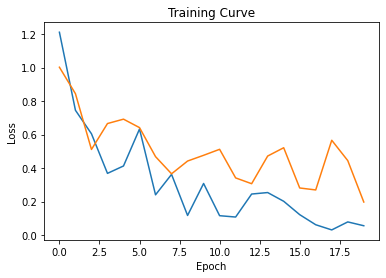

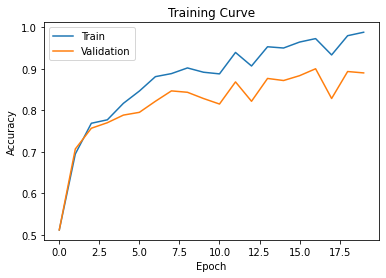

In [ ]:
#Train on the big dataset
#batch_size = 124
#num_of_epoches = 20
#lr = 0.001

fruit_big1 = CNN_new()

use_cuda = True
if use_cuda and torch.cuda.is_available():
  fruit_big1.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
#proper model
train(fruit_big1, trainset, valset, batch_size=124, num_epochs=20, learning_rate=0.001)

In [ ]:
#Convolutional Neural Network Architecture
class CNN_new_1(nn.Module):
    def __init__(self):
        self.name = "CNN_new_1"
        super(CNN_new_1, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) #in_channels, out_chanels, kernel_size
        #self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) #in_channels, out_chanels, kernel_size
        self.conv3 = nn.Conv2d(32, 64, 2, padding=1) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(50176, 56)
        self.fc2 = nn.Linear(56, 6)
        self.relu = nn.ReLU()
        #self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = F.max_pool2d(self.relu(self.conv1(x)), 2)
        x = F.max_pool2d(self.relu(self.conv2(x)), 2)
        x = F.max_pool2d(self.relu(self.conv3(x)), 2)
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        # Apply dropout
        # x = self.dropout(x)
        x = self.fc2(x)
        return x

CUDA is available!  Training on GPU ...
Epoch 1; Loss 0.895641; Train Acc 0.644667; Val Acc 0.650000
Epoch 2; Loss 0.681609; Train Acc 0.759333; Val Acc 0.753333
Epoch 3; Loss 0.444889; Train Acc 0.801333; Val Acc 0.776667
Epoch 4; Loss 0.523718; Train Acc 0.833667; Val Acc 0.820000
Epoch 5; Loss 0.485375; Train Acc 0.888333; Val Acc 0.860000
Epoch 6; Loss 0.514311; Train Acc 0.862000; Val Acc 0.816667
Epoch 7; Loss 0.350666; Train Acc 0.890000; Val Acc 0.851667
Epoch 8; Loss 0.294452; Train Acc 0.927000; Val Acc 0.895000
Epoch 9; Loss 0.248071; Train Acc 0.939667; Val Acc 0.905000
Epoch 10; Loss 0.366660; Train Acc 0.939000; Val Acc 0.885000
Epoch 11; Loss 0.220293; Train Acc 0.961667; Val Acc 0.903333
Epoch 12; Loss 0.273181; Train Acc 0.954000; Val Acc 0.891667
Epoch 13; Loss 0.095384; Train Acc 0.961000; Val Acc 0.903333
Epoch 14; Loss 0.244313; Train Acc 0.967333; Val Acc 0.903333
Epoch 15; Loss 0.309332; Train Acc 0.990000; Val Acc 0.908333
Epoch 16; Loss 0.239060; Train Acc 0.98

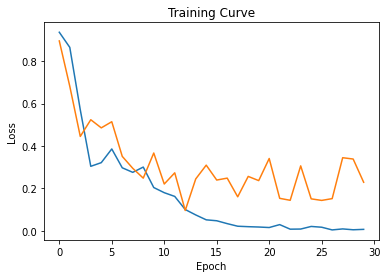

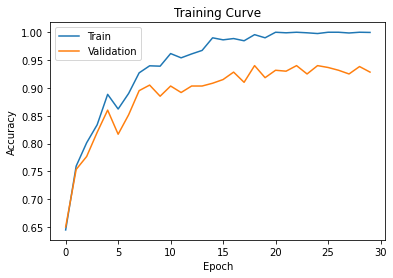

In [ ]:
#Train on the big dataset
#batch_size = 128
#num_of_epoches = 30
#lr = 0.001

fruit_big2 = CNN_new_1()

use_cuda = True
if use_cuda and torch.cuda.is_available():
  fruit_big2.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
#proper model
train(fruit_big2, trainset, valset, batch_size=128, num_epochs=30, learning_rate=0.001)

In [ ]:
#Convolutional Neural Network Architecture
class CNN_new_2(nn.Module):
    def __init__(self):
        self.name = "CNN_new_2"
        super(CNN_new_2, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) #in_channels, out_chanels, kernel_size
        #self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) #in_channels, out_chanels, kernel_size
        self.conv3 = nn.Conv2d(32, 64, 2, padding=1) #in_channels, out_chanels, kernel_size
        self.conv4 = nn.Conv2d(64, 128, 2, padding=1) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(25088, 256)
        self.fc2 = nn.Linear(256, 56)
        self.fc3 = nn.Linear(56, 6)
        self.relu = nn.ReLU()
        #self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = F.max_pool2d(self.relu(self.conv1(x)), 2)
        x = F.max_pool2d(self.relu(self.conv2(x)), 2)
        x = F.max_pool2d(self.relu(self.conv3(x)), 2)
        x = F.max_pool2d(self.relu(self.conv4(x)), 2)
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        # Apply dropout
        # x = self.dropout(x)
        x = self.fc3(x)
        return x

CUDA is available!  Training on GPU ...
Epoch 1; Loss 1.381617; Train Acc 0.513667; Val Acc 0.510000
Epoch 2; Loss 0.830018; Train Acc 0.662667; Val Acc 0.650000
Epoch 3; Loss 0.665941; Train Acc 0.704000; Val Acc 0.686667
Epoch 4; Loss 0.718994; Train Acc 0.739000; Val Acc 0.715000
Epoch 5; Loss 0.717317; Train Acc 0.779667; Val Acc 0.756667
Epoch 6; Loss 0.656755; Train Acc 0.780667; Val Acc 0.768333
Epoch 7; Loss 0.461942; Train Acc 0.822000; Val Acc 0.798333
Epoch 8; Loss 0.448007; Train Acc 0.832667; Val Acc 0.811667
Epoch 9; Loss 0.426191; Train Acc 0.873333; Val Acc 0.856667
Epoch 10; Loss 0.470467; Train Acc 0.873000; Val Acc 0.851667
Epoch 11; Loss 0.385332; Train Acc 0.891000; Val Acc 0.878333
Epoch 12; Loss 0.233159; Train Acc 0.910333; Val Acc 0.888333
Epoch 13; Loss 0.182145; Train Acc 0.911000; Val Acc 0.875000
Epoch 14; Loss 0.301616; Train Acc 0.924667; Val Acc 0.888333
Epoch 15; Loss 0.410209; Train Acc 0.922667; Val Acc 0.888333
Epoch 16; Loss 0.306422; Train Acc 0.94

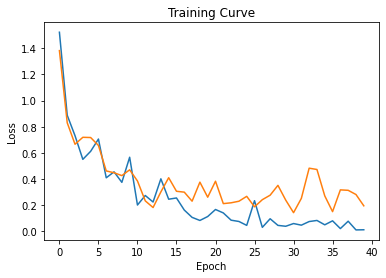

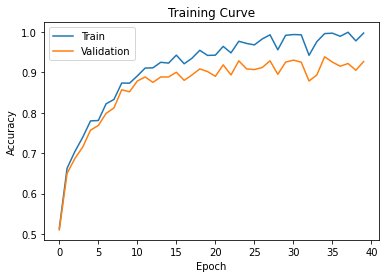

In [ ]:
#Train on the big dataset
#batch_size = 128
#num_of_epoches = 40
#lr = 0.0005

fruit_big3 = CNN_new_2()

use_cuda = True
if use_cuda and torch.cuda.is_available():
  fruit_big3.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
#proper model
train(fruit_big3, trainset, valset, batch_size=128, num_epochs=40, learning_rate=0.0005)